#On utilisr pearson uniquement pour verifier unenrelation linéaire entre les variables
Variables doivent etres quantitatives et linéaires et suivrent la loi normales
Utilisons shapiro

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

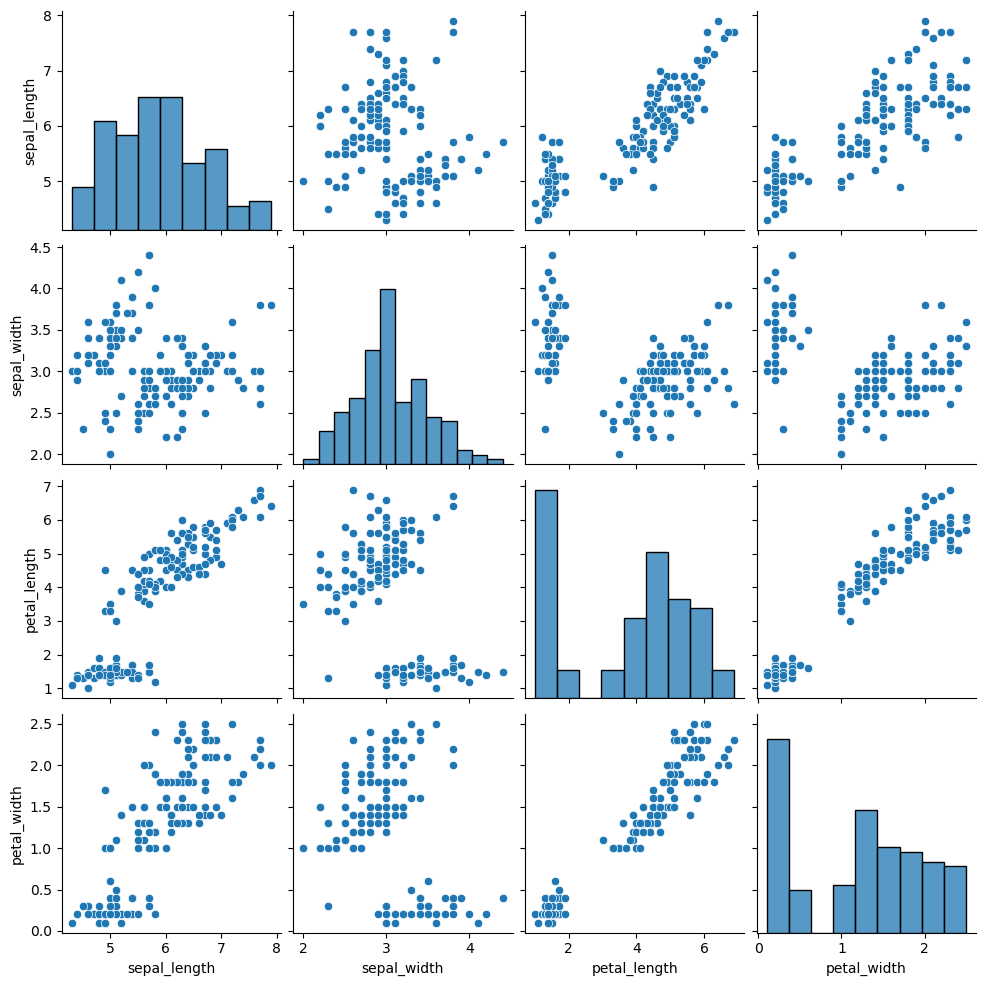

In [5]:
iris =sns.load_dataset("iris")
sns.pairplot(iris ,kind="scatter")

In [29]:
import scipy.stats as st
from scipy.stats import shapiro, pearsonr, spearmanr,kendalltau

In [12]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
var1='sepal_length'
var2='petal_length'

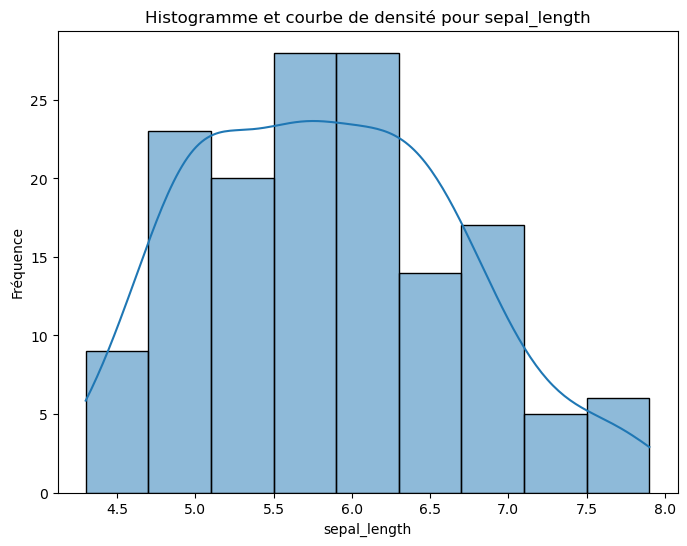

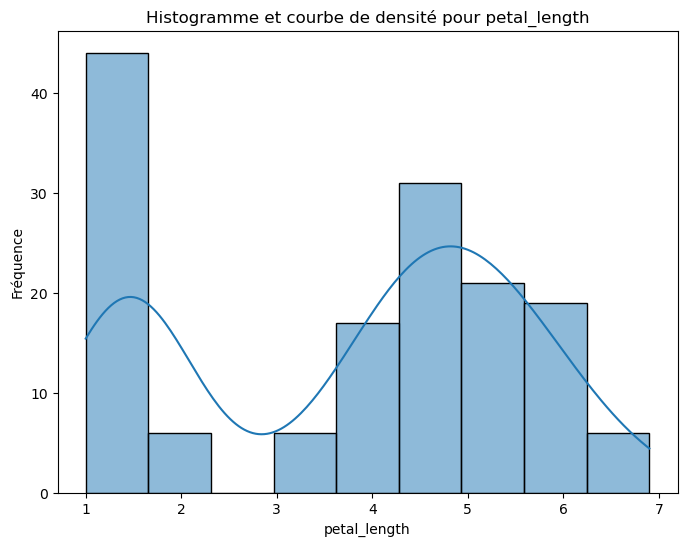

P-valeur de la normalité (Shapiro-Wilk) pour sepal_length: 0.01018026564270258
P-valeur de la normalité (Shapiro-Wilk) pour petal_length: 7.412652158755861e-10


In [14]:
# Analyse graphique de la normalité des deux variables
for var in [var1, var2]:
    plt.figure(figsize=(8, 6))
    sns.histplot(iris[var], kde=True)
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.title(f"Histogramme et courbe de densité pour {var}")
    plt.show()

# Vérifier la normalité à l'aide du test de Shapiro-Wilk
for var in [var1, var2]:
    _, p_value = shapiro(iris[var])
    print(f"P-valeur de la normalité (Shapiro-Wilk) pour {var}:", p_value)


Nous ne pouvons pas utiliser pearson parce que la normalté n'est pas vérifier 
Mais les pvalues montre une significativité 
Utilisons pearmen qui montre la relation monotone

In [16]:
pearsonr(iris[var1],iris[var2])

PearsonRResult(statistic=0.8717537758865832, pvalue=1.0386674194497525e-47)

In [18]:
kendalltau(iris[var1],iris[var2])

KendalltauResult(correlation=0.7185159275387326, pvalue=1.1691259442824266e-36)

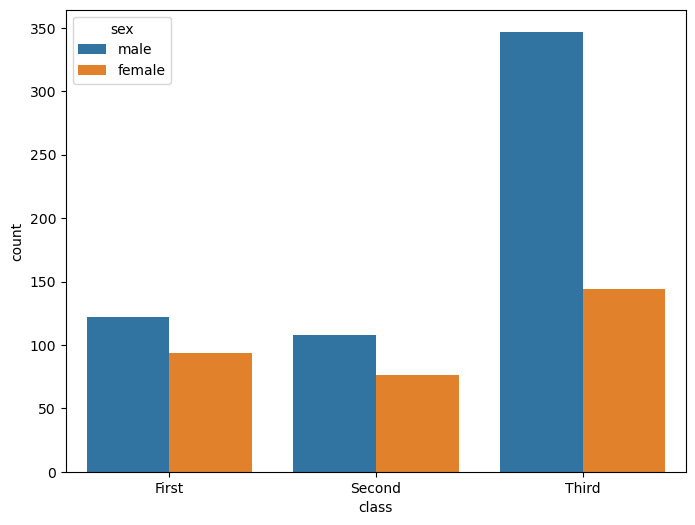

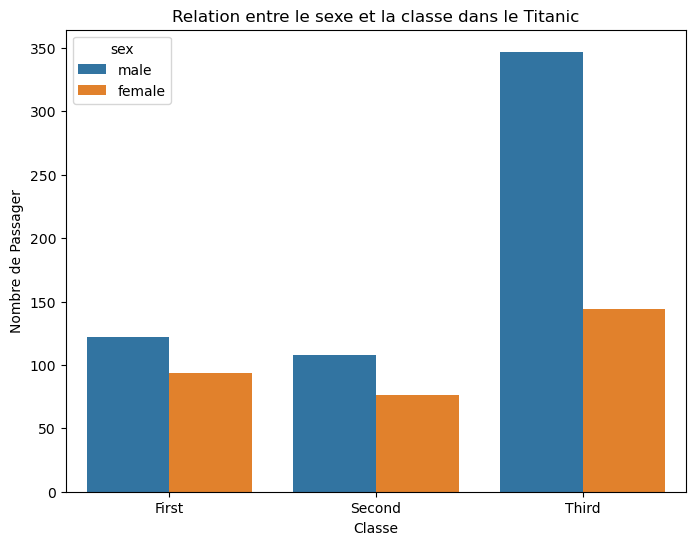

In [7]:
import seaborn as sns
titanic=sns.load_dataset("titanic")
plt.figure(figsize=(8,6))
sns.countplot(data=titanic,x='class',hue='sex')
plt.xlabel('Classe')
plt.ylabel('Nombre de Passager')
plt.title('Relation entre le sexe et la classe dans le Titanic')
plt.show()

In [9]:

# Calcul de chi deux sur la base titanic
from scipy.stats import chi2_contingency

In [18]:
contengency=pd.crosstab(titanic['sex'],titanic['class'])
contengency

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


Pour utiliser Khi-2 on doit avoir plus de 5 partout ,sinon fischer

In [19]:
chi2_stat ,p_value,dof ,expected_freq =chi2_contingency(contengency)

In [21]:
# Afficher les résultats
print("Statistique du chi-carré :", chi2_stat)
print("P-valeur :", p_value)
print("Degrés de liberté :", dof)
print("Fréquences attendues :\n", expected_freq)


Statistique du chi-carré : 16.971499095517114
P-valeur : 0.00020638864348233114
Degrés de liberté : 2
Fréquences attendues :
 [[ 76.12121212  64.84399551 173.03479237]
 [139.87878788 119.15600449 317.96520763]]


A present on connait qu'il y a liaison mais on connait pas  l'intensite
2. Coefficient de Cramér-V
Le coefficient de Cramér-V mesure la force de l'association entre deux variables qualitatives. Il varie entre 0 (pas d'association) et 1 (association parfaite).

Conditions d'utilisation
Les deux variables sont qualitatives (catégoriques).
Le test du chi-carré a déjà été effectué et a montré une association significative entre les deux variables.
Interprétation
Plus la valeur de Cramér-V est proche de 1 (supérieur à 0.60), plus l'association entre les deux variables est forte.

In [24]:
# Calculer le coefficient de Cramér-V
n = contengency.sum().sum()
min_dim = min(contengency.shape) - 1
cramer_v = np.sqrt(chi2_stat / (n * min_dim))

# Afficher le coefficient de Cramér-V
print("Coefficient de Cramér-V :", cramer_v)

Coefficient de Cramér-V : 0.1380133986221395


Coefficient T de Tschuprow

In [30]:
# Calculer le coefficient T de Tschuprow
n = titanic.shape[0]
min_dim = min(contengency.shape) - 1
# Effectuer le test du chi-carré
chi2, p_value, _, _ = st.chi2_contingency(contengency)
tschuprow_t = np.sqrt(chi2 / (n * min_dim))

print("Coefficient T de Tschuprow :", tschuprow_t)
print("P-valeur :", p_value)

Coefficient T de Tschuprow : 0.1380133986221395
P-valeur : 0.00020638864348233114


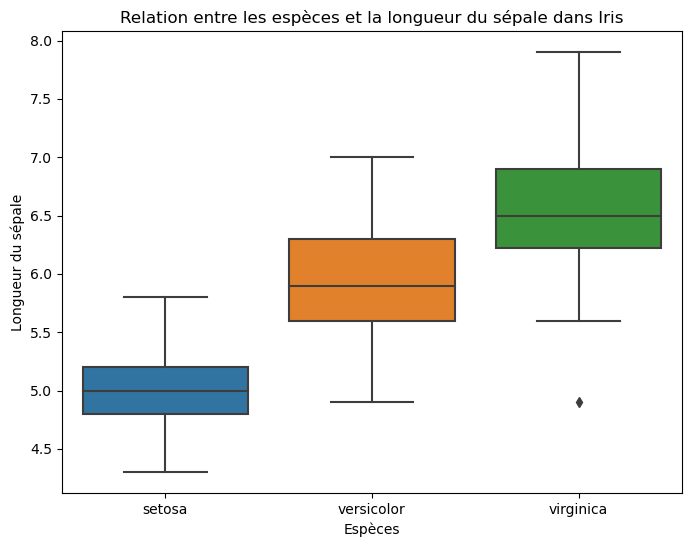

In [31]:
# Créer un boxplot de la relation entre 'species' et 'sepal_length' dans Iris
plt.figure(figsize=(8, 6))
sns.boxplot(data=iris, x='species', y='sepal_length')
plt.xlabel('Espèces')
plt.ylabel('Longueur du sépale')
plt.title('Relation entre les espèces et la longueur du sépale dans Iris')
plt.show()



##  Test de Student (t-test)
Le Test est fait pour deux variables ,donc on va juste prendre deux d'abord
Verifier la normalité
### Hypothèses
- H0 (hypothèse nulle): Les **moyennes** des deux groupes sont égales.
- H1 (hypothèse alternative): Les moyennes des deux groupes sont différentes.

### Conditions d'utilisation
- La variable quantitative est **normalement** distribuée dans chaque groupe.
- **Les variances des deux groupes sont égales**.
- Les observations sont indépendantes.

### Interprétation
Si la p-valeur est inférieure au seuil de significativité (généralement 0,05), on rejette l'hypothèse nulle et on conclut que les moyennes des deux groupes sont significativement différentes.



P-valeur de la normalité (Shapiro-Wilk) - Setosa: 0.4595010578632355
P-valeur de la normalité (Shapiro-Wilk) - Virginica: 0.25831347703933716
P-valeur de la normalité (Shapiro-Wilk) - Versicolor: 0.4647378921508789


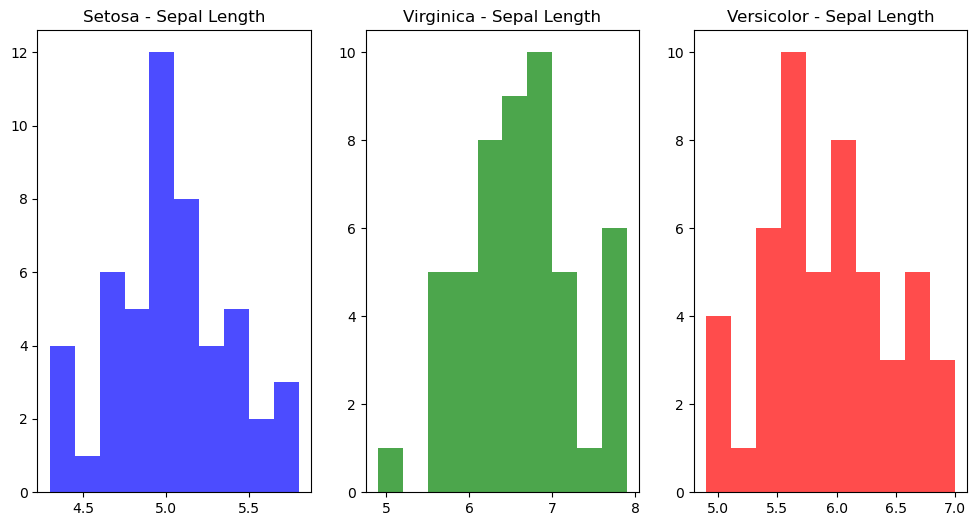

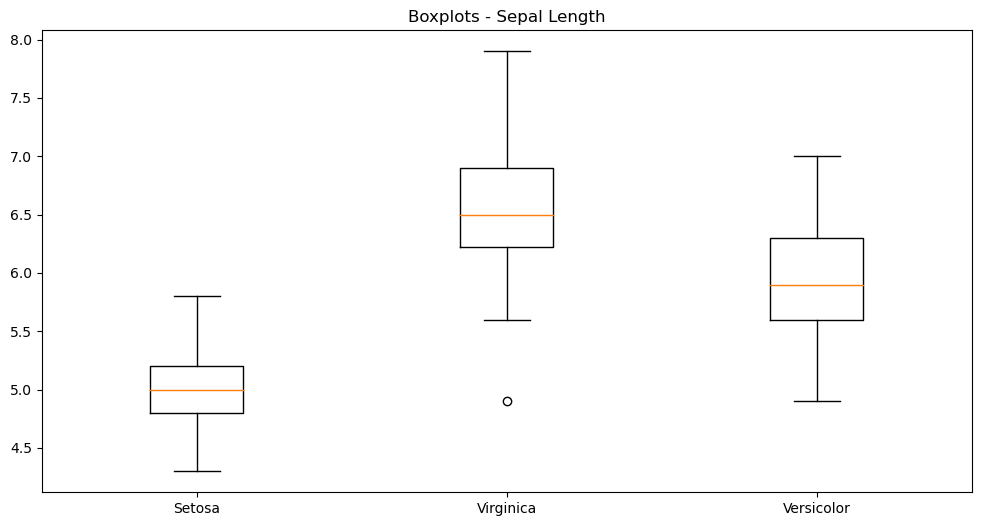

In [34]:
## Vérification de la normalité

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ttest_ind, f_oneway, mannwhitneyu, kruskal

# Charger le jeu de données Iris
iris = sns.load_dataset('iris')

# Séparer les données en groupes en fonction de l'espèce
setosa = iris[iris['species'] == 'setosa']['sepal_length']
virginica = iris[iris['species'] == 'virginica']['sepal_length']
versicolor = iris[iris['species'] == 'versicolor']['sepal_length']

# Vérifier la normalité à l'aide du test de Shapiro-Wilk
_, setosa_p_value = shapiro(setosa)
_, virginica_p_value = shapiro(virginica)
_, versicolor_p_value = shapiro(versicolor)

print("P-valeur de la normalité (Shapiro-Wilk) - Setosa:", setosa_p_value)
print("P-valeur de la normalité (Shapiro-Wilk) - Virginica:", virginica_p_value)
print("P-valeur de la normalité (Shapiro-Wilk) - Versicolor:", versicolor_p_value)

# Histogrammes pour vérifier visuellement la normalité
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.hist(setosa, bins=10, color='blue', alpha=0.7)
plt.title("Setosa - Sepal Length")
plt.subplot(132)
plt.hist(virginica, bins=10, color='green', alpha=0.7)
plt.title("Virginica - Sepal Length")
plt.subplot(133)
plt.hist(versicolor, bins=10, color='red', alpha=0.7)
plt.title("Versicolor - Sepal Length")
plt.show()

# Boîtes à moustaches pour vérifier visuellement la normalité
plt.figure(figsize=(12, 6))
plt.boxplot([setosa, virginica, versicolor], labels=['Setosa', 'Virginica', 'Versicolor'])
plt.title("Boxplots - Sepal Length")
plt.show()



In [35]:

# Test de Student (t-test)
t_stat, t_p_value = ttest_ind(setosa, virginica)
print("Statistique t de Student :", t_stat)
print("P-valeur (t-test) :", t_p_value)

Statistique t de Student : -15.386195820079404
P-valeur (t-test) : 6.892546060674059e-28


Si le test de normalité n'est pas verifier on fait le test non paramétrique :
analyse la médiane des deux groupe est identique ;

In [36]:
# Test de Mann-Whitney
mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(setosa, virginica)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)


Statistique U de Mann-Whitney : 38.5
P-valeur (Mann-Whitney) : 6.396699069396538e-17


Si on doit faire pour les 3 groupe ,anova
Normalité et variance constante 

In [37]:
# ANOVA
anova_stat, anova_p_value = f_oneway(setosa, virginica, versicolor)
print("Statistique F de l'ANOVA :", anova_stat)
print("P-valeur (ANOVA) :", anova_p_value)

Statistique F de l'ANOVA : 119.26450218450468
P-valeur (ANOVA) : 1.6696691907693826e-31


### Test de Levene pour l'égalité des variances
Analyse l'egalité des variance

Le test de Levene est utilisé pour vérifier **l'hypothèse d'égalité des variances** entre plusieurs groupes. Il est particulièrement utile après l'ANOVA pour vérifier l'hypothèse d'homoscédasticité.

## Hypothèses
- H0 (hypothèse nulle): Les variances des différents groupes sont égales.
- H1 (hypothèse alternative): Au moins une des variances des différents groupes est différente.

## Conditions d'utilisation
- Les échantillons sont indépendants.
- Les observations dans chaque groupe sont indépendantes et identiquement distribuées.

## Interprétation
Si la p-valeur est inférieure à un seuil de signification prédéfini (par exemple, 0,05), on rejette l'hypothèse nulle et on conclut que les variances ne sont pas égales entre les groupes.

In [38]:
from scipy.stats import levene

# Test de Levene pour l'égalité des variances
levene_stat, levene_p_value = levene(setosa, virginica, versicolor)
print("Statistique W de Levene :", levene_stat)
print("P-valeur (Levene) :", levene_p_value)

Statistique W de Levene : 6.35272002048269
P-valeur (Levene) : 0.0022585277836218586


##Les variances sont pas egale alors on va utiliser un test non parametrique
## Test de Kruskal-Wallis

### Hypothèses
- H0 (hypothèse nulle): Les distributions de tous les groupes sont égales.
- H1 (hypothèse alternative): Au moins une des distributions des groupes est différente des autres.

### Conditions d'utilisation
- Les observations sont indépendantes.
- Les données peuvent être ordonnées (au moins ordinale).

In [40]:
# Test de Kruskal-Wallis

kruskal_stat, kruskal_p_value = kruskal(setosa, virginica, versicolor)
print("Statistique H de Kruskal-Wallis :", kruskal_stat)
print("P-valeur (Kruskal-Wallis) :", kruskal_p_value)

Statistique H de Kruskal-Wallis : 96.93743600064833
P-valeur (Kruskal-Wallis) : 8.91873433246198e-22
